In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("select_feature_quantile.csv")
data=data.drop(columns=['Unnamed: 0','Unnamed: 0.1','Federal Provider Number','Provider Phone Number','Location','Legal Business Name','Rating Cycle 1 Standard Survey Health Date',
                       'Rating Cycle 2 Standard Health Survey Date','Rating Cycle 3 Standard Health Survey Date',
                       'Processing Date','Week Ending','date'])
data=data.dropna()
data = data.applymap(lambda x: 0 if x == "." else x)
data["Total Residents COVID-19 Deaths as a Percentage of Confirmed COVID-19 Cases"].describe()
data.shape

(7704, 63)

In [3]:
data=data.drop(columns=['Provider SSA County','Provider County Name','Provider Resides in Hospital','Provider Type',
                        'Date First Approved to Provide Medicare and Medicaid services'
                       ,'Continuing Care Retirement Community','Abuse Icon','Most Recent Health Inspection More Than 2 Years Ago',
                        'Provider Changed Ownership in Last 12 Months'
                       ,'Automatic Sprinkler Systems in All Required Areas'])
data.shape

(7704, 53)

In [4]:
x=data.iloc[:,:-1]
x=pd.get_dummies(x,columns=['Ownership Type',
                            
                           'With a Resident and Family Council'
                           ])

y=data.iloc[:,-1]

x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=12345678,shuffle=True)

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)


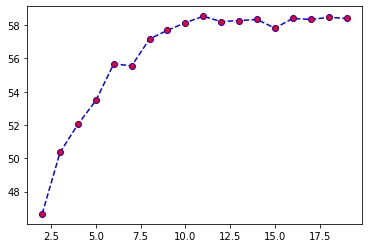

knn with k= 11 58.53341985723556 %
[46.658014276443865, 50.35691109669046, 52.04412719013628, 53.47177157689812, 55.67813108371188, 55.54834523036989, 57.17066839714471, 57.68981181051266, 58.14406229720961, 58.53341985723556, 58.2089552238806, 58.273848150551586, 58.33874107722258, 57.81959766385464, 58.40363400389358, 58.33874107722258, 58.468526930564565, 58.40363400389358]


In [5]:
from sklearn.neighbors import KNeighborsClassifier


accuracy=[]
for i in range(2,20):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    knnA=accuracy_score(y_test,knn.predict(x_test))*100
    accuracy.append(knnA)
plt.figure()
plt.plot(range(2,20),accuracy,'-ok',c='blue',linestyle='dashed',markerfacecolor='red')
plt.show()
print("knn with k=", accuracy.index(max(accuracy))+2,max(accuracy),"%")
print(accuracy)
#5: 34.97728747566515
#8: 38.221933809214796
#9:36.794289422452955

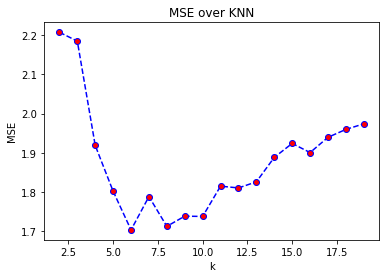

knn with k= 6 1.7034393251135627
[2.207657365347177, 2.1849448410123298, 1.918883841661259, 1.8020765736534718, 1.7034393251135627, 1.7884490590525632, 1.7125243348475017, 1.7384815055158989, 1.7378325762491889, 1.8150551589876704, 1.8105126541207008, 1.826086956521739, 1.8883841661258922, 1.9240752757949384, 1.900713822193381, 1.9396495781959766, 1.9597663854639844, 1.9740428293316028]


In [6]:

mse=[]
for i in range(2,20):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    knnA=mean_squared_error(y_test, y_pred)
    mse.append(knnA)
plt.figure()
plt.plot(range(2,20),mse,'-ok',c='blue',linestyle='dashed',markerfacecolor='red')
plt.title("MSE over KNN")
plt.xlabel('k')
plt.ylabel('MSE')
plt.show()
print("knn with k=", mse.index(min(mse))+2,min(mse))
print(mse)
 
#5:3.8786502271252434
#8:3.8442569759896172
#9: 3.972096041531473

In [15]:
from sklearn.linear_model import ElasticNet

en = ElasticNet(random_state=12345678)
en.fit(x_train,y_train)
y_pred = en.predict(x_test)
print('MSE for Elastic Net: '+ str(mean_squared_error(y_test, y_pred)))


count=0
for i,j in zip(np.round(y_pred),y_test.to_numpy()):
    if i==j:
        count+=1
accuracy=count/len(y_test)*100
print('accuracy for elastic net: ',accuracy)
#print(np.round(y_pred),y_test.to_numpy())

MSE for Elastic Net: 1.169271674972683
accuracy for elastic net:  22.19338092147956


In [8]:
#random f
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=12345678).fit(x_train,y_train)
y_predict_train=rf_clf.predict(x_train)
y_predict_test=rf_clf.predict(x_test)
#print("train set accuracy ",accuracy_score(y_train,y_predict_train)*100)
print("random forest accuracy", accuracy_score(y_test,y_predict_test )*100,"%")
print('MSE for rf: '+ str(mean_squared_error(y_test, y_pred)))

random forest accuracy 99.1563919532771 %
MSE for rf: 1.169271674972683


In [9]:
#SVM
from sklearn.svm import SVC
scaler1=StandardScaler().fit(x_train)
        
scaled_x_train=scaler1.transform(x_train)
scaled_x_test=scaler1.transform(x_test)
svm=SVC(gamma='auto').fit(scaled_x_train,y_train)
y_pred=svm.predict(x_test)
svm_accu=accuracy_score(y_test,y_pred)
print("svm accuracy",svm_accu*100,"%")
print('MSE for svm: '+ str(mean_squared_error(y_test, y_pred)))

svm accuracy 87.86502271252434 %
MSE for svm: 0.3575600259571707


In [10]:
#Lasso 
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
lasso_clf = LassoCV(cv=5, random_state=12345678).fit(x_train, y_train)
y_pred = lasso_clf.predict(x_test)
#print("Lasso accuracy",accuracy_score(y_test,y_pred))
print('MSE for Lasso: '+ str(mean_squared_error(y_test, y_pred)))
count=0
for i,j in zip(np.round(y_pred),y_test.to_numpy()):
    if i==j:
        count+=1
accuracy=count/len(y_test)*100
print('accuracy for Lasso: ',accuracy)

MSE for Lasso: 0.4213863984744125
accuracy for Lasso:  62.751460090850095


In [11]:
#ridge
ridge_clf = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1]).fit(x_train, y_train)
y_pred = ridge_clf.predict(x_test)
#print("Ridge accuracy",accuracy_score(y_test,y_pred))
print('MSE for Ridge: '+ str(mean_squared_error(y_test, y_pred)))
count=0
for i,j in zip(y_pred,y_test.to_numpy()):
    if i==j:
        count+=1
accuracy=count/len(y_test)*100
count=0
for i,j in zip(np.round(y_pred),y_test.to_numpy()):
    if i==j:
        count+=1
accuracy=count/len(y_test)*100
print('accuracy for ridge: ',accuracy)

MSE for Ridge: 0.41959185091287626
accuracy for ridge:  62.297209604153146


In [12]:
#Naive Bayes
bayes=GaussianNB()
bayes.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print('MSE for Naive Bayes: '+ str(mean_squared_error(y_test, y_pred)))
print("NB accuracy",accuracy_score(y_test,y_pred)*100,"%")

MSE for Naive Bayes: 1.9740428293316028
NB accuracy 58.40363400389358 %


In [13]:
#DT
cart_clf = DecisionTreeClassifier(max_depth=100, random_state=12345678).fit(x_train, y_train)
y_pred = cart_clf.predict(x_test)
print('MSE for Decision Tree: '+ str(mean_squared_error(y_test, y_pred)))
count=0
for i,j in zip(np.round(y_pred),y_test.to_numpy()):
    if i==j:
        count+=1
accuracy=count/len(y_test)*100
print('accuracy for Decision Tree: ',accuracy)


MSE for Decision Tree: 0.0
accuracy for Decision Tree:  100.0


In [14]:
#NN
mlp = MLPClassifier(hidden_layer_sizes=(100,20), max_iter=5000,activation = 'relu',solver='adam')
mlp.fit(x_train, y_train)
y_pred = mlp.predict(x_test)
print("NN accuracy",accuracy_score(y_test,y_pred)*100,"%")
print('MSE for Neural Network '+str(mean_squared_error(y_test, y_pred)))



NN accuracy 94.28942245295264 %
MSE for Neural Network 0.08241401687216093
